| **Inicio** | **Siguiente 2** |
|----------- |-------------- |
| [🏠](../README.md) | [⏩](./2_Fundamentos_Matematicos_para_Machine_Learning.ipynb)|

# **1. Introducción a Machine Learning**

## **Conceptos Básicos**

### **Definición de machine learning**

El *Machine Learning* (ML) o Aprendizaje Automático es un campo de la inteligencia artificial que se enfoca en el desarrollo de algoritmos y modelos que permiten a las computadoras aprender de datos para realizar tareas específicas sin una programación explícita. En lugar de seguir instrucciones específicas, los modelos de machine learning son capaces de aprender patrones y hacer predicciones basadas en la información proporcionada.

**Fórmulas Matemáticas:**

1. **Regresión Lineal (Simple):**

   - **Hipótesis:**

   $(h_\theta(x) = \theta_0 + \theta_1 \cdot x)$

   - **Función de Costo:**

   $J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$

   - **Algoritmo de Actualización de Parámetros (Gradiente Descendente):**

     $\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}$

2. **Clasificación con Regresión Logística:**

   - **Hipótesis:**

   $h_\theta(x) = \frac{1}{1 + e^{-\theta^Tx}}$

   - **Función de Costo:**

    $J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))]$

   - **Algoritmo de Actualización de Parámetros (Gradiente Descendente):**

     $\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}$

**Explicación Detallada con Ejemplo y Gráficos en Python:**

Vamos a considerar un ejemplo de regresión lineal simple para predecir la puntuación de un estudiante en función de las horas de estudio. Utilizaremos el conjunto de datos ficticio y aplicaremos el algoritmo de regresión lineal para encontrar la mejor línea de ajuste.

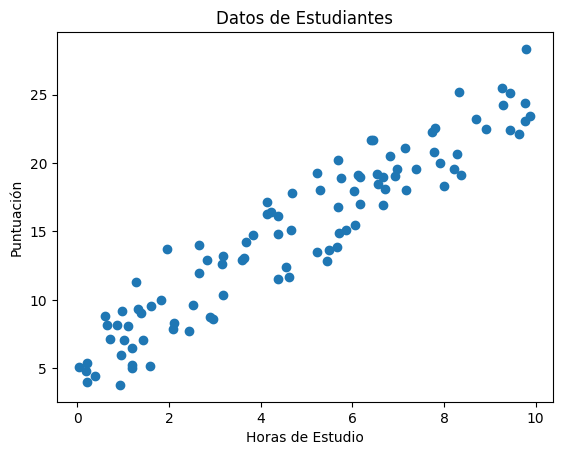

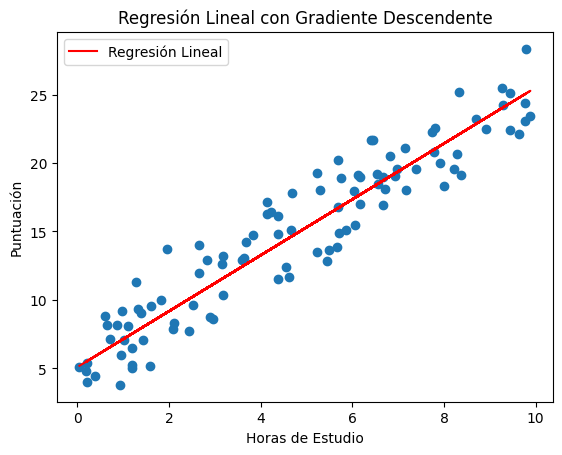

Parámetros finales de la regresión:
[[5.09024952]
 [2.04244992]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos ficticios
np.random.seed(0)
hours_studied = np.random.rand(100, 1) * 10
scores = 2 * hours_studied + 5 + np.random.randn(100, 1) * 2

# Graficar datos
plt.scatter(hours_studied, scores)
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntuación')
plt.title('Datos de Estudiantes')
plt.show()

# Algoritmo de Regresión Lineal con Gradiente Descendente
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = X.T.dot(errors) / m
        theta -= learning_rate * gradient
    return theta

# Agregar una columna de unos a la matriz de características
X = np.c_[np.ones((100, 1)), hours_studied]

# Inicializar parámetros
theta_initial = np.zeros((2, 1))

# Definir hiperparámetros
alpha = 0.01
num_iterations = 1000

# Aplicar el algoritmo de gradiente descendente
theta_final = gradient_descent(X, scores, theta_initial, alpha, num_iterations)

# Graficar la línea de regresión
plt.scatter(hours_studied, scores)
plt.plot(hours_studied, X.dot(theta_final), color='red', label='Regresión Lineal')
plt.xlabel('Horas de Estudio')
plt.ylabel('Puntuación')
plt.title('Regresión Lineal con Gradiente Descendente')
plt.legend()
plt.show()

# Imprimir los parámetros finales de la regresión
print('Parámetros finales de la regresión:')
print(theta_final)

Este código genera datos ficticios de estudiantes, grafica los puntos de datos y aplica un algoritmo de regresión lineal con gradiente descendente para encontrar la mejor línea de ajuste. La línea de regresión se visualiza en rojo. Este es solo un ejemplo simple, y en la práctica, los problemas de machine learning pueden involucrar conjuntos de datos más complejos y algoritmos más avanzados.

### **Tipos de aprendizaje: supervisado, no supervisado, y reforzado**

**1. Aprendizaje Supervisado:**

En el aprendizaje supervisado, el modelo se entrena utilizando un conjunto de datos que incluye entradas y las salidas correspondientes (etiquetas). El objetivo es aprender una relación entre las entradas y las salidas para hacer predicciones sobre datos no vistos.

**Ejemplo: Regresión Lineal**

Supongamos que queremos predecir el precio de una casa basándonos en su tamaño. La regresión lineal es un ejemplo de aprendizaje supervisado.

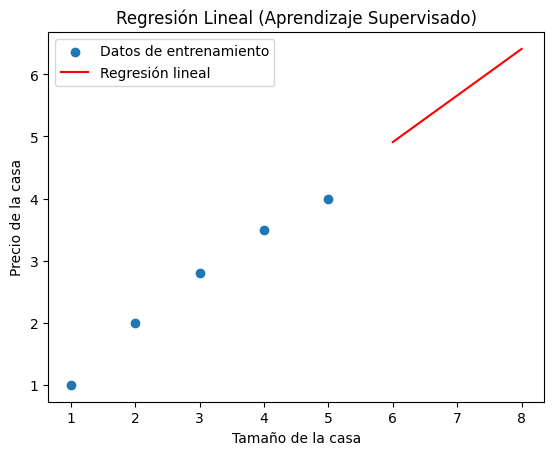

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrenamiento
X_train = np.array([1, 2, 3, 4, 5])
y_train = np.array([1, 2, 2.8, 3.5, 4])

# Ajustar una regresión lineal
coefficients = np.polyfit(X_train, y_train, 1)
model = np.poly1d(coefficients)

# Datos de prueba
X_test = np.array([6, 7, 8])
y_pred = model(X_test)

# Graficar datos y regresión lineal
plt.scatter(X_train, y_train, label='Datos de entrenamiento')
plt.plot(X_test, y_pred, label='Regresión lineal', color='red')
plt.xlabel('Tamaño de la casa')
plt.ylabel('Precio de la casa')
plt.title('Regresión Lineal (Aprendizaje Supervisado)')
plt.legend()
plt.show()

En este ejemplo, tenemos datos de entrenamiento que representan el tamaño y el precio de casas. Ajustamos una regresión lineal a estos datos y luego hacemos predicciones para tamaños de casas no vistos.

**2. Aprendizaje No Supervisado:**

En el aprendizaje no supervisado, el modelo se entrena en datos sin etiquetas. El objetivo principal es encontrar patrones o estructuras en los datos, como agrupamientos (clustering) o reducción de dimensionalidad.

**Ejemplo: K-Means (Agrupamiento)**

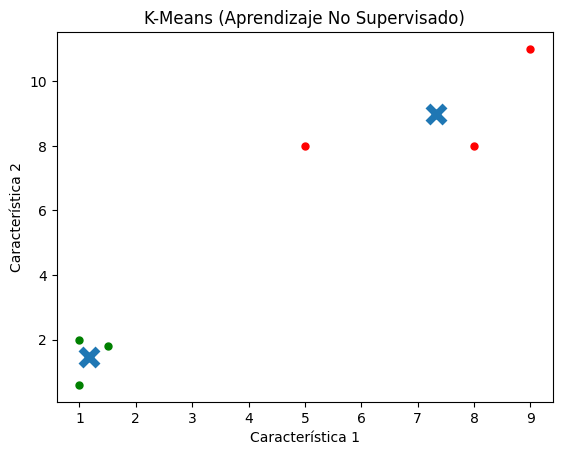

In [4]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Datos sin etiquetas
X = np.array([[1, 2], [5, 8], [1.5, 1.8], [8, 8], [1, 0.6], [9, 11]])

# Entrenar el modelo de K-Means
kmeans = KMeans(n_clusters=2, n_init=10)  # O el valor que desees
kmeans.fit(X)

# Obtener las etiquetas de los clusters y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Graficar los datos y los clusters encontrados
colors = ["g.", "r."]
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=150, linewidths=5, zorder=10)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('K-Means (Aprendizaje No Supervisado)')
plt.show()

En este ejemplo, utilizamos el algoritmo K-Means para agrupar los datos en dos clusters. No se proporcionan etiquetas; el modelo encuentra patrones en los datos y asigna etiquetas a los clusters.

**3. Aprendizaje Reforzado:**

En el aprendizaje reforzado, un agente aprende a tomar decisiones secuenciales en un entorno para maximizar una recompensa acumulativa. El agente toma acciones en el entorno y recibe retroalimentación en forma de recompensas.

**Ejemplo: Q-Learning**

In [5]:
import numpy as np

# Matriz de recompensas
R = np.array([
    [-1, -1, -1, -1, 0, -1],
    [-1, -1, -1, 0, -1, 100],
    [-1, -1, -1, 0, -1, -1],
    [-1, 0, 0, -1, 0, -1],
    [0, -1, -1, 0, -1, 100],
    [-1, 0, -1, -1, 0, 100]
])

# Matriz Q (inicializada con ceros)
Q = np.zeros_like(R, dtype=float)

# Hiperparámetros
gamma = 0.8  # Factor de descuento
alpha = 0.8  # Tasa de aprendizaje

# Algoritmo Q-Learning
for _ in range(1000):
    state = np.random.randint(0, 6)
    while np.sum(R[state, :]) == -6:  # Asegurar que no estamos en un estado objetivo
        state = np.random.randint(0, 6)
    
    next_state = np.random.choice(np.where(R[state, :] >= 0)[0])
    possible_actions = np.where(R[state, :] >= 0)[0]
    action = np.random.choice(possible_actions)
    
    Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (R[state, action] + gamma * np.max(Q[next_state, :]))

# Imprimir la matriz Q aprendida
print('Matriz Q aprendida:')
print(Q)

Matriz Q aprendida:
[[  0.           0.           0.           0.         282.74836307
    0.        ]
 [  0.           0.           0.         259.36056323   0.
  394.67610103]
 [  0.           0.           0.         248.31589434   0.
    0.        ]
 [  0.         248.77091423 310.397536     0.         280.47654542
    0.        ]
 [305.41878474   0.           0.         238.77401932   0.
  351.54941036]
 [  0.         288.46473745   0.           0.         310.9030219
  382.17115948]]


En este ejemplo, utilizamos el algoritmo Q-Learning para aprender la matriz Q, que representa la utilidad de tomar ciertas acciones en ciertos estados. El agente aprende a maximizar las recompensas acumulativas a medida que toma decisiones en el entorno.

Por favor, ten en cuenta que el código proporcionado es un ejemplo básico para ilustrar los conceptos. La implementación real puede variar según la complejidad del problema y la biblioteca de machine learning utilizada.

## **Aplicaciones Prácticas**

### **Casos de uso y ejemplos de machine learning en la vida real**

El machine learning (aprendizaje automático) tiene una amplia variedad de aplicaciones en la vida real, que van desde la clasificación de imágenes hasta la predicción de patrones en datos financieros. Aquí hay algunos casos de uso y ejemplos de machine learning en diferentes industrias:

### 1. **Salud y Medicina:**

   - **Diagnóstico Médico:** Clasificación de imágenes médicas para la detección de enfermedades como el cáncer mediante algoritmos de aprendizaje profundo.
   - **Predicción de Enfermedades:** Utilización de datos de pacientes para predecir el riesgo de enfermedades crónicas y proporcionar intervenciones preventivas.

### 2. **Finanzas:**

   - **Evaluación Crediticia:** Análisis de datos financieros para evaluar el riesgo crediticio de los solicitantes y tomar decisiones de préstamos.
   - **Predicción del Mercado:** Modelos predictivos para prever las tendencias del mercado y optimizar carteras de inversión.

### 3. **Comercio Electrónico:**

   - **Recomendación de Productos:** Sistemas de recomendación que sugieren productos a los usuarios basándose en sus historiales de compras y comportamientos.
   - **Detección de Fraudes:** Identificación de actividades fraudulentas mediante el análisis de patrones de comportamiento.

### 4. **Automatización Industrial:**

   - **Control de Calidad:** Inspección visual automatizada para detectar defectos en productos manufacturados.
   - **Mantenimiento Predictivo:** Predicción de fallos en maquinaria y equipos para programar el mantenimiento de manera eficiente.

### 5. **Transporte y Logística:**

   - **Rutas Óptimas:** Optimización de rutas de entrega y gestión de flotas para minimizar costos y tiempos de entrega.
   - **Planificación de Inventario:** Predicción de la demanda para gestionar eficientemente los niveles de inventario.

### 6. **Educación:**

   - **Personalización del Aprendizaje:** Adaptación de contenidos educativos según el estilo de aprendizaje y el rendimiento individual del estudiante.
   - **Evaluación Automatizada:** Corrección automatizada de exámenes y evaluaciones mediante el análisis de respuestas.

### 7. **Redes Sociales:**

   - **Análisis de Sentimientos:** Seguimiento y análisis de opiniones de usuarios en redes sociales para comprender el sentimiento general hacia productos o eventos.
   - **Reconocimiento Facial:** Etiquetado automático de fotos y detección de rostros en plataformas sociales.

### 8. **Recursos Humanos:**

   - **Selección de Talento:** Filtrado y clasificación automática de currículos para identificar candidatos adecuados.
   - **Análisis de Retención:** Modelos predictivos para identificar empleados propensos a abandonar la empresa.

### 9. **Gobierno:**

   - **Análisis de Datos Geoespaciales:** Utilización de datos geográficos para la planificación urbana y la toma de decisiones.
   - **Predicción de Crímenes:** Modelos para predecir la ocurrencia de delitos y asignar recursos policiales de manera eficiente.

Estos son solo algunos ejemplos, y la aplicación de machine learning continúa expandiéndose en diversas industrias y sectores. La capacidad de analizar grandes conjuntos de datos y extraer patrones hace que el machine learning sea una herramienta valiosa en la toma de decisiones y la mejora de procesos en la vida cotidiana.

### **Tendencias y desarrollos en la industria**

1. **Aprendizaje Automático Explicable (XAI):**
   - La transparencia en los modelos de machine learning es cada vez más importante. Los avances en XAI buscan hacer que los modelos sean comprensibles y explicables, lo que es crucial para la toma de decisiones en entornos críticos como la salud y las finanzas.

2. **Aprendizaje Federado:**
   - La privacidad de los datos es una preocupación creciente. El aprendizaje federado permite entrenar modelos en dispositivos locales sin necesidad de compartir datos centralmente. Esto es especialmente relevante en aplicaciones de salud y dispositivos IoT.

3. **Aprendizaje por Reforzamiento Avanzado:**
   - En áreas como la robótica y los juegos, el aprendizaje por reforzamiento avanzado está siendo utilizado para enseñar a los sistemas a realizar tareas complejas mediante la experimentación y la retroalimentación.

4. **Desarrollos en Procesadores de Aprendizaje Profundo:**
   - Se están diseñando procesadores especializados para acelerar operaciones de aprendizaje profundo, como las unidades de procesamiento de tensor (TPUs) y las unidades de procesamiento neuronal (NPUs), para mejorar la eficiencia y el rendimiento de los modelos.

5. **Inteligencia Artificial Cuántica:**
   - La exploración de la computación cuántica para problemas de machine learning está en aumento. Se espera que las computadoras cuánticas ofrezcan ventajas significativas para ciertas tareas, como la optimización y el procesamiento paralelo.

6. **Desarrollos en Redes Neuronales Generativas (GANs):**
   - Las GANs están siendo utilizadas en aplicaciones creativas y realistas, como la generación de imágenes y la creación de contenido. También se están aplicando en el mejoramiento de la realidad virtual y aumentada.

7. **Automatización del Aprendizaje Automático:**
   - Herramientas y plataformas de automatización del ciclo de vida del machine learning están simplificando y acelerando el proceso de desarrollo de modelos, desde la preparación de datos hasta la implementación.

8. **Énfasis en la Ética y la Responsabilidad:**
   - Existe una creciente conciencia sobre la necesidad de abordar cuestiones éticas en el machine learning, como sesgos en los datos y en los modelos. Se están desarrollando marcos éticos y directrices para promover prácticas responsables.

9. **Integración de Machine Learning y Blockchain:**
   - La combinación de tecnologías de machine learning y blockchain se está explorando para mejorar la seguridad, la transparencia y la confianza en diversas aplicaciones, como la gestión de la cadena de suministro y la autenticación.

10. **Aprendizaje Continuo y Autoaprendizaje:**
   - Los modelos de machine learning que pueden aprender de manera continua y adaptarse a cambios en los datos están ganando importancia. Esto es crucial para entornos dinámicos donde los datos evolucionan con el tiempo.

Estas tendencias reflejan el rápido avance y la evolución constante en el campo del machine learning. La adopción de estas tecnologías puede variar según la industria y las necesidades específicas, pero en general, estas tendencias están dando forma al futuro del machine learning. Es importante estar al tanto de los desarrollos actuales y futuros para aprovechar al máximo las capacidades de esta tecnología.

| **Inicio** | **Siguiente 2** |
|----------- |-------------- |
| [🏠](../README.md) | [⏩](./2_Fundamentos_Matematicos_para_Machine_Learning.ipynb)|